In [2]:
#Importando a biblioteca
import pandas as pd

In [3]:
#leitura de todos os arquivos
df1 = pd.read_excel ("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel ("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel ("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel ("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel ("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [4]:
#juntando todos os arquivos
df = pd.concat ([df1,df2,df3,df4,df5])

In [5]:
#exibindo as primeiras 5 linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
#Exibindo as ultimas 5 linhas TAIL = CAUDA
df.tail()



,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
118,Fortaleza,2019-03-02,17.70,981,5
116,Aracaju,2018-01-01,48.44,1522,4
222,Salvador,2019-01-02,43.96,1037,1
32,Fortaleza,2019-01-01,43.33,1004,4
69,Fortaleza,2019-01-01,216.65,1003,6


In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
#ALTERANDO O TIPO DE DADO DA COLUNA LOJA ID
df["LojaID"] = df["LojaID"].astype("object")

In [10]:
df.dtypes


Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

TRATANDO VALORES FALTANTES

In [11]:
df.isnull() .sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
#SUBSTITUINDO VALORES NULOS PELA MEDIA
df["Vendas"].fillna(df["Vendas"].mean(),inplace = True)

In [13]:
#SUBSTITUINDO OS VALORES NULOS POR ZERO
df["Vendas"].fillna(0,inplace =True)

In [14]:
#apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"],inplace = True)

In [15]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all",inplace=True)

CRIANDO COLUNAS NOVAS

In [16]:
#Criando a coluna de receita  #MUL MULTIPLICACAO
df ["Receita"] = df ["Vendas"].mul(df["Qtde"])

In [17]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [18]:
#RETORNANDO A M AIOR RECEITA
df["Receita"].max()

3544.0

In [19]:
df["Receita"].min()

3.34

In [20]:
#NLARGEST - TOP 3
df.nlargest (3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [21]:
#NSAMLLEST - TOP 3
df.nsmallest (3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [22]:
#AGRUPAMENTO POR CIDADE
df.groupby ("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [23]:
#ORDENANDO O CONJUNTO DE DADOS
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


TRABALHANDO COM DATAS

In [24]:
#Transformando a coluna de data em tipo data
df ["Data"] = pd.to_datetime(df["Data"])

In [26]:
df.dtypes


Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [28]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [29]:
#Criando uma nova coluna com o ano

In [30]:
df["Ano_venda"] = df ["Data"].dt.year

In [31]:
df.sample

<bound method NDFrame.sample of        Cidade       Data  Vendas LojaID  Qtde  Receita  Ano_venda
0     Aracaju 2018-01-01  142.00   1520     1   142.00       2018
1     Aracaju 2018-01-01   14.21   1522     6    85.26       2018
2     Aracaju 2018-01-01   71.55   1520     1    71.55       2018
3     Aracaju 2018-01-01    3.01   1521     7    21.07       2018
4     Aracaju 2018-01-01   24.51   1522     8   196.08       2018
..        ...        ...     ...    ...   ...      ...        ...
235  Salvador 2019-01-03   41.84   1034     1    41.84       2019
236  Salvador 2019-01-03  126.29   1035     3   378.87       2019
237  Salvador 2019-01-03   38.06   1036     3   114.18       2019
238  Salvador 2019-01-03  139.64   1035     1   139.64       2019
239  Salvador 2019-01-03  161.41   1037     3   484.23       2019

[894 rows x 7 columns]>

In [32]:
#Extraindo o mes e o dia
df["mes_venda"],df ["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [33]:
df.sample (5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda
14,Salvador,2019-01-12,109.01,1035,2,218.02,2019,1,12
37,Natal,2018-10-03,726.00,852,2,1452.00,2018,10,3
64,Fortaleza,2019-01-01,110.31,1005,4,441.24,2019,1,1
147,Natal,2019-01-02,34.50,1035,1,34.50,2019,1,2
99,Aracaju,2018-01-01,139.32,1521,3,417.96,2018,1,1


In [34]:
#RETORNANDO A DATA MAIS ANTIGA
df ["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [35]:
#Calculando a diferença de dias
df ["diferenca_dias"] = df["Data"] - df ["Data"].min()

In [37]:
df.sample (5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias
42,Salvador,2019-01-01,44.28,1034,1,44.28,2019,1,1,365 days
93,Aracaju,2018-01-01,188.70,1523,1,188.70,2018,1,1,0 days
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days
134,Recife,2019-03-02,195.18,980,5,975.90,2019,3,2,425 days
34,Natal,2019-01-07,484.00,852,2,968.00,2019,1,7,371 days


In [42]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df ["Data"].dt.quarter

In [57]:
df.sample (5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,trimestre_venda
41,Fortaleza,2019-02-13,191.29,1002,3,573.87,2019,2,13,408 days,1,1
8,Salvador,2019-02-11,4.96,1036,2,9.92,2019,2,11,406 days,1,1
167,Natal,2019-01-02,36.42,1037,1,36.42,2019,1,2,366 days,1,1
91,Fortaleza,2019-01-01,37.49,1002,1,37.49,2019,1,1,365 days,1,1
86,Aracaju,2018-01-01,154.92,1521,5,774.60,2018,1,1,0 days,1,1


In [58]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [60]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,trimestre_venda
66,Natal,2019-03-24,559.00,853,2,1118.00,2019,3,24,447 days,1,1
136,Recife,2019-03-02,39.09,982,4,156.36,2019,3,2,425 days,1,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2019,3,2,425 days,1,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1,1
135,Recife,2019-03-02,10.79,983,5,53.95,2019,3,2,425 days,1,1
139,Recife,2019-03-02,141.16,980,7,988.12,2019,3,2,425 days,1,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1,1
126,Recife,2019-03-02,41.87,980,8,334.96,2019,3,2,425 days,1,1
123,Fortaleza,2019-03-02,20.22,981,6,121.32,2019,3,2,425 days,1,1
117,Salvador,2019-03-02,39.41,1034,1,39.41,2019,3,2,425 days,1,1


VISUALIZACAO DE DADOS

In [61]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

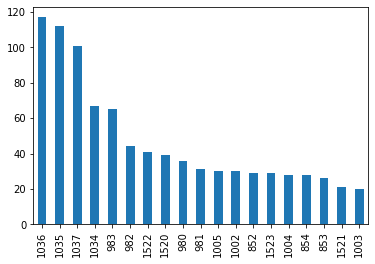

In [62]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

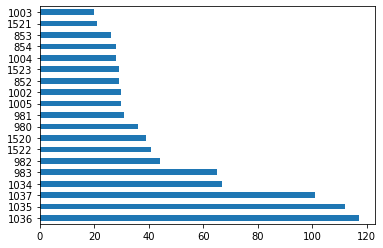

In [63]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

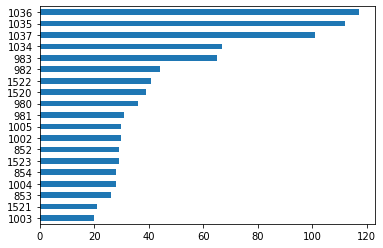

In [64]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

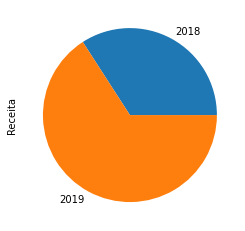

In [65]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [66]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

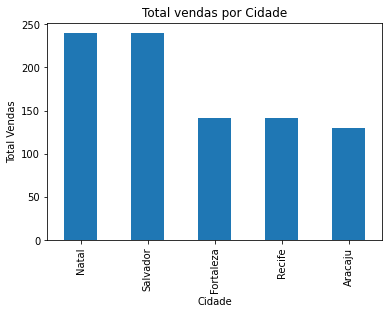

In [67]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

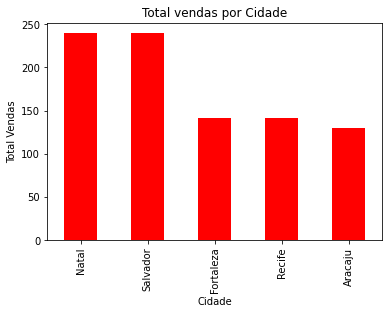

In [68]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [69]:
#Alterando o estilo
plt.style.use("ggplot")

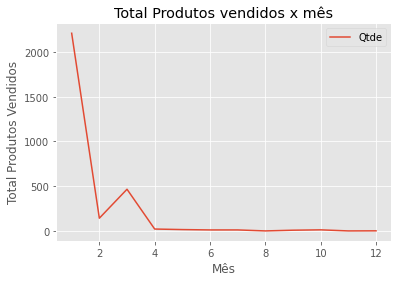

In [70]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [71]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [76]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,trimestre_venda
76,Recife,2019-01-01,17.86,980,5,89.30,2019,1,1,365 days,1,1
166,Salvador,2019-01-02,111.72,1035,3,335.16,2019,1,2,366 days,1,1
83,Salvador,2019-01-01,63.66,1036,2,127.32,2019,1,1,365 days,1,1
52,Aracaju,2018-01-01,14.76,1520,3,44.28,2018,1,1,0 days,1,1
87,Natal,2019-01-02,135.19,1034,2,270.38,2019,1,2,366 days,1,1


In [77]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_venda"] == 2019]

In [78]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

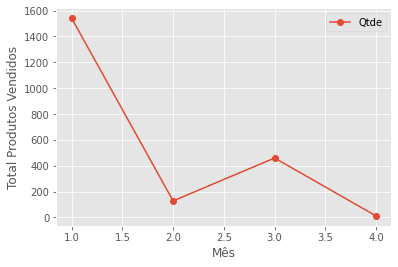

In [79]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

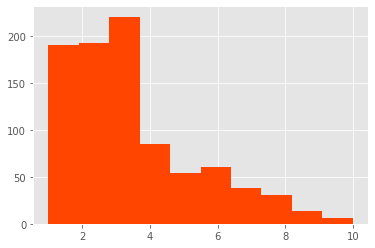

In [80]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

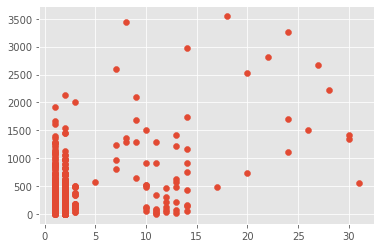

In [81]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

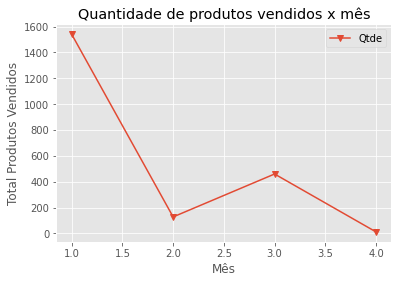

In [82]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")